In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving All Years Air Quality Calculations.csv to All Years Air Quality Calculations.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv('All Years Air Quality Calculations.csv')

In [5]:
# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479 entries, 0 to 7478
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   geoid                      7479 non-null   object 
 1   geoid20                    7479 non-null   int64  
 2   year                       7479 non-null   int64  
 3   denom_total_pop            7479 non-null   int64  
 4   pm25_concentration         7479 non-null   float64
 5   pm25_concentration_pctile  7479 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 350.7+ KB
None
            geoid20         year  denom_total_pop  pm25_concentration  \
count  7.479000e+03  7479.000000      7479.000000         7479.000000   
mean   6.037403e+09  2017.333333      3971.765076           11.640572   
std    2.303562e+05     2.867633      1417.087968            1.413307   
min    6.037101e+09  2014.000000         0.000000            0.000000   
25%    6.037

In [6]:
# Handling missing values
df = df.dropna()

In [7]:
# Selecting numerical features (using 'pm25_concentration' as target)
y = df['pm25_concentration']
X = df.drop(columns=['pm25_concentration', 'geoid', 'geoid20'])  # Dropping non-numeric identifiers

In [8]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Training the model
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf'),
    "Linear Regression": LinearRegression()
}

In [11]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "R2": r2}
    print(f"{name} -> MAE: {mae}, MSE: {mse}, R2: {r2}")

Random Forest -> MAE: 0.021160288595819414, MSE: 0.01251831705681842, R2: 0.9932768321827029
XGBoost -> MAE: 0.027878516249475457, MSE: 0.015125400503108444, R2: 0.9918766551905762
KNN Regressor -> MAE: 0.07951069681818186, MSE: 0.07961183777117903, R2: 0.9572431547188262
SVR -> MAE: 0.22191189649587836, MSE: 0.41521238552244183, R2: 0.7770033675439518
Linear Regression -> MAE: 0.5620790157332322, MSE: 0.9377111137240618, R2: 0.49638684232897423


In [14]:
# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T
print(results_df.head())

                        MAE       MSE        R2
Random Forest      0.021160  0.012518  0.993277
XGBoost            0.027879  0.015125  0.991877
KNN Regressor      0.079511  0.079612  0.957243
SVR                0.221912  0.415212  0.777003
Linear Regression  0.562079  0.937711  0.496387


In [15]:
# Determine the AQI category based on the predicted PM2.5 concentration
for aqi_pm25 in y_pred:
    if aqi_pm25 <= 50:
        category = "Good"
    elif aqi_pm25 <= 100:
        category = "Moderate"
    elif aqi_pm25 <= 150:
        category = "Unhealthy for Sensitive Groups"
    elif aqi_pm25 <= 200:
        category = "Unhealthy"
    elif aqi_pm25 <= 300:
        category = "Very Unhealthy"
    else:
        category = "Hazardous"
    print(f"Predicted PM2.5: {aqi_pm25}, Category: {category}")

Predicted PM2.5: 10.232968764854, Category: Good
Predicted PM2.5: 12.29707193672204, Category: Good
Predicted PM2.5: 11.735913448531845, Category: Good
Predicted PM2.5: 11.564577526692595, Category: Good
Predicted PM2.5: 11.555746755780442, Category: Good
Predicted PM2.5: 10.90018202968989, Category: Good
Predicted PM2.5: 12.190961912719576, Category: Good
Predicted PM2.5: 11.964264979216592, Category: Good
Predicted PM2.5: 12.783425492753958, Category: Good
Predicted PM2.5: 13.531354672328455, Category: Good
Predicted PM2.5: 10.235163077626112, Category: Good
Predicted PM2.5: 10.860047132891626, Category: Good
Predicted PM2.5: 11.294013303890857, Category: Good
Predicted PM2.5: 10.127894583645494, Category: Good
Predicted PM2.5: 10.421988244260664, Category: Good
Predicted PM2.5: 11.867487644585191, Category: Good
Predicted PM2.5: 13.057047092189006, Category: Good
Predicted PM2.5: 12.295344033302054, Category: Good
Predicted PM2.5: 12.987738920484526, Category: Good
Predicted PM2.5: 

<Figure size 1200x600 with 0 Axes>

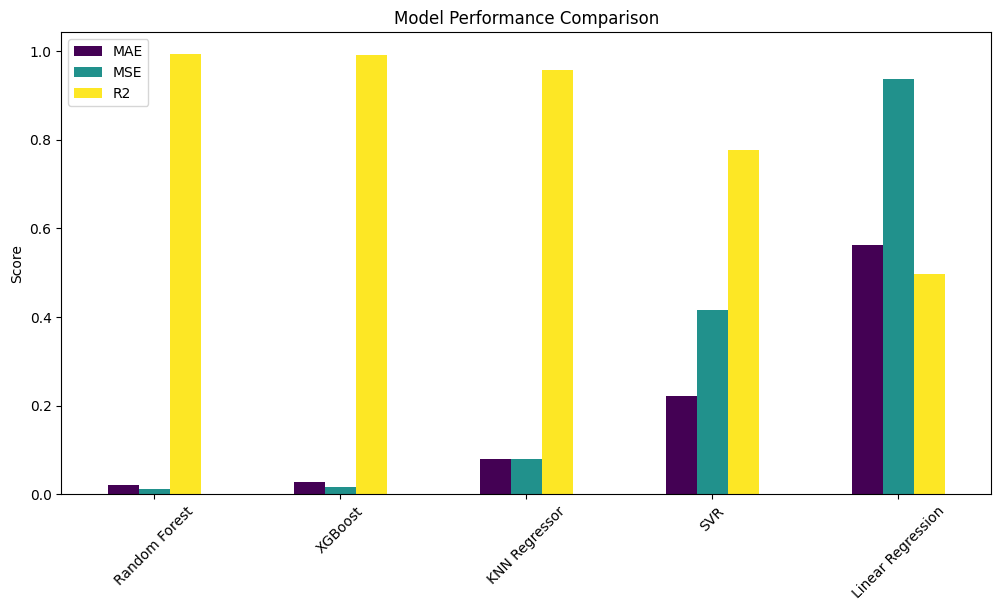

In [16]:
# Plot Model Performance
plt.figure(figsize=(12, 6))
results_df[['MAE', 'MSE', 'R2']].plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [17]:
# Scatter plot of actual vs predicted for the best model (Random Forest as example)
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

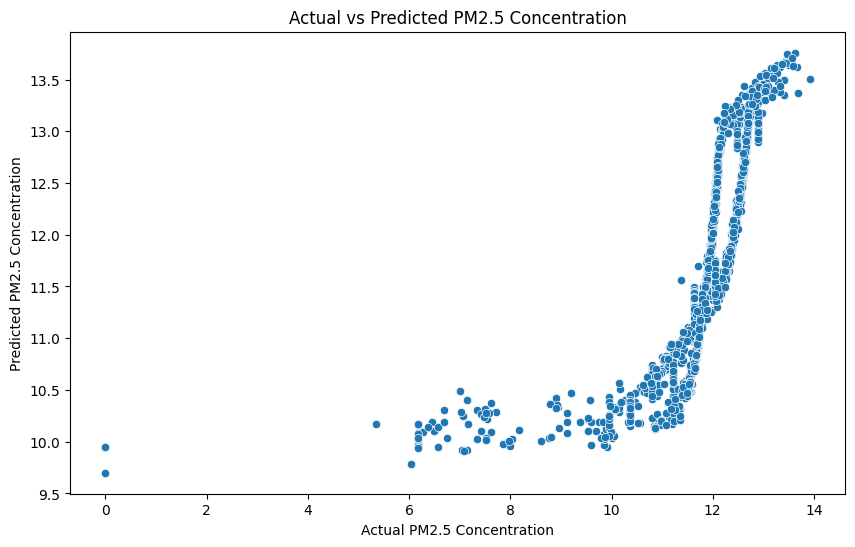

In [18]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual PM2.5 Concentration")
plt.ylabel("Predicted PM2.5 Concentration")
plt.title("Actual vs Predicted PM2.5 Concentration")
plt.show()

<ipython-input-19-64d03be9316c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')


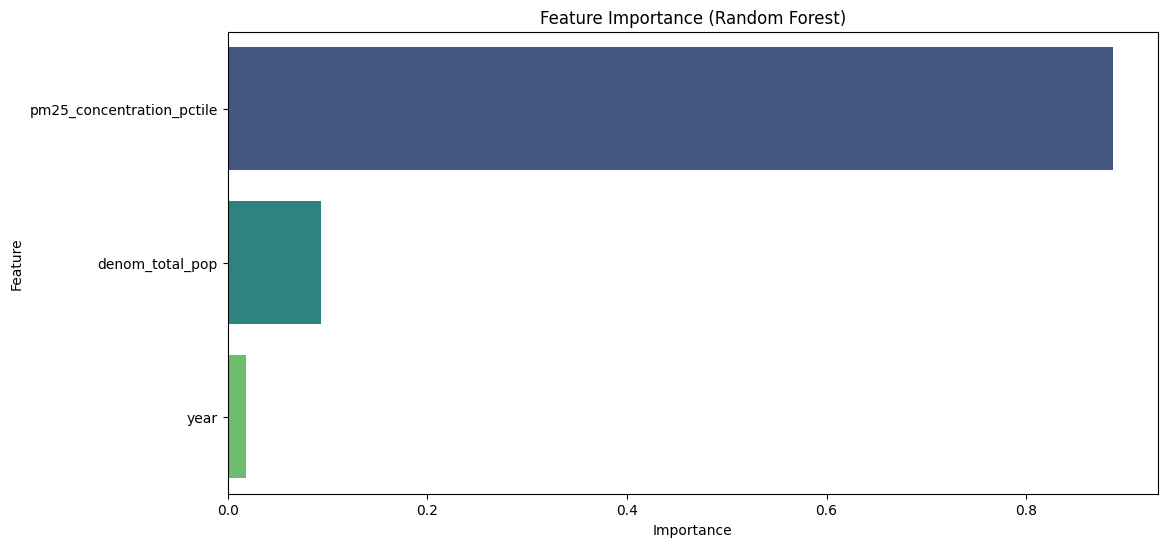

In [19]:
# Feature Importance Bar Chart (Only for tree-based models like Random Forest and XGBoost)
if best_model_name in ["Random Forest", "XGBoost"]:
    feature_importances = best_model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
    plt.title(f"Feature Importance ({best_model_name})")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

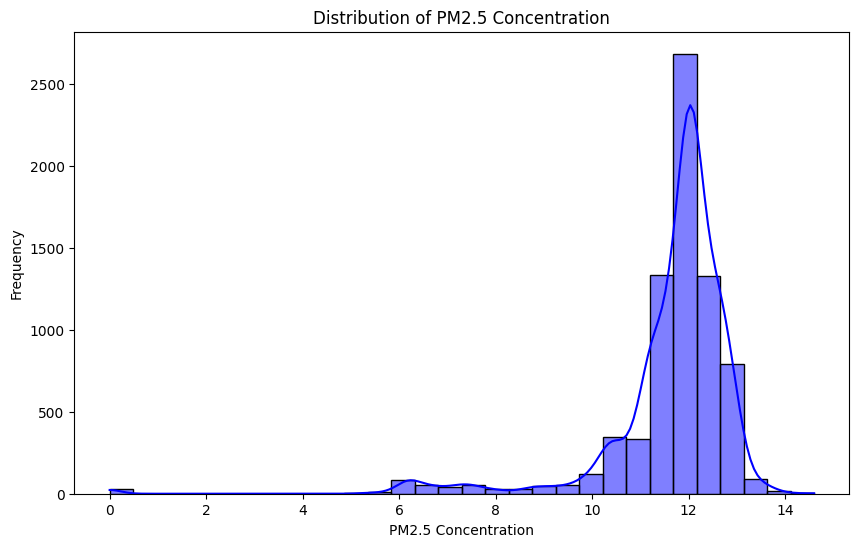

In [20]:
# Distribution of PM2.5 Concentration
plt.figure(figsize=(10, 6))
sns.histplot(df['pm25_concentration'], bins=30, kde=True, color='blue')
plt.title("Distribution of PM2.5 Concentration")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("Frequency")
plt.show()